<a href="https://colab.research.google.com/github/SirvavialTAG/MachineLearning/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ практика 5. Задача регрессии

## **Цель занятия:**
Изучить задачу регрессии, познакомиться с метриками качества, реализовать модель для решения задачи с использованием разных моделей.

## **Задание состоит из следующих частей:**
1. Понимание значимости отбора признаков
2. Обучение регрессии
3. Метирки качества для регресии (только самые важные)
4. Регулязризация

## Задачи для домашки ⏰

1. Выбрать y = непрерывная переменая
2. Разделить на обучающую, тестовую и валидационную выборки
3. Выбрать лучшие признаки для X и выбрать лучший результат
4. Объяснить результаты метрик качества MAE, MSE, R2

**Для 👽**
5. Попробовать модель ```KNeighborsRegressor```, объяснить как работает модель, объяснить результат
6. Попробовать модель ```DecisionTreeRegressor```, объяснить как работает модель, объяснить результат

In [1]:
! pip install pandas scikit-learn seaborn scipy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
df = pd.read_csv('bank.csv')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
y = df['age'] # выбираем целевую переменную (количественная)
X = df.drop('age', axis=1) # переменные для проверки влияния

# Переводим столбцы с типом данных 'object' в тип данных 'category'
for col in X.columns:
  if X[col].dtype == 'object':
    X[col] = X[col].astype('category')

In [6]:
X

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   job        45211 non-null  category
 1   marital    45211 non-null  category
 2   education  45211 non-null  category
 3   default    45211 non-null  category
 4   balance    45211 non-null  int64   
 5   housing    45211 non-null  category
 6   loan       45211 non-null  category
 7   contact    45211 non-null  category
 8   day        45211 non-null  int64   
 9   month      45211 non-null  category
 10  duration   45211 non-null  int64   
 11  campaign   45211 non-null  int64   
 12  pdays      45211 non-null  int64   
 13  previous   45211 non-null  int64   
 14  poutcome   45211 non-null  category
 15  deposit    45211 non-null  category
dtypes: category(10), int64(6)
memory usage: 2.5 MB


In [8]:
# Создаем копию данных
category_columns: list[str] = X.select_dtypes(include=['category']).columns # собираем колонки помеченные как category

# Применяем One-Hot Encoding к категориальным столбцам, исключая первую категорию (drop_first=True)
X = pd.get_dummies(X, columns=category_columns,drop_first=True)

In [9]:
X

,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
0,2143,5,261,1,-1,0,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
1,29,5,151,1,-1,0,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,2,5,76,1,-1,0,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,1506,5,92,1,-1,0,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,1,5,198,1,-1,0,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,825,17,977,3,-1,0,False,False,False,False,...,False,False,False,True,False,False,False,False,True,True
45207,1729,17,456,2,-1,0,False,False,False,False,...,False,False,False,True,False,False,False,False,True,True
45208,5715,17,1127,5,184,3,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
45209,668,17,508,4,-1,0,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [10]:
# Создаем копию данных
df_corr_test = X.copy()

# Добавляем целевую переменную в копию данных
df_corr_test['y'] = y
df_corr_test

,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes,y
0,2143,5,261,1,-1,0,False,False,False,True,...,False,True,False,False,False,False,False,True,False,58
1,29,5,151,1,-1,0,False,False,False,False,...,False,True,False,False,False,False,False,True,False,44
2,2,5,76,1,-1,0,False,True,False,False,...,False,True,False,False,False,False,False,True,False,33
3,1506,5,92,1,-1,0,True,False,False,False,...,False,True,False,False,False,False,False,True,False,47
4,1,5,198,1,-1,0,False,False,False,False,...,False,True,False,False,False,False,False,True,False,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,825,17,977,3,-1,0,False,False,False,False,...,False,False,True,False,False,False,False,True,True,51
45207,1729,17,456,2,-1,0,False,False,False,False,...,False,False,True,False,False,False,False,True,True,71
45208,5715,17,1127,5,184,3,False,False,False,False,...,False,False,True,False,False,False,True,False,True,72
45209,668,17,508,4,-1,0,True,False,False,False,...,False,False,True,False,False,False,False,True,False,57


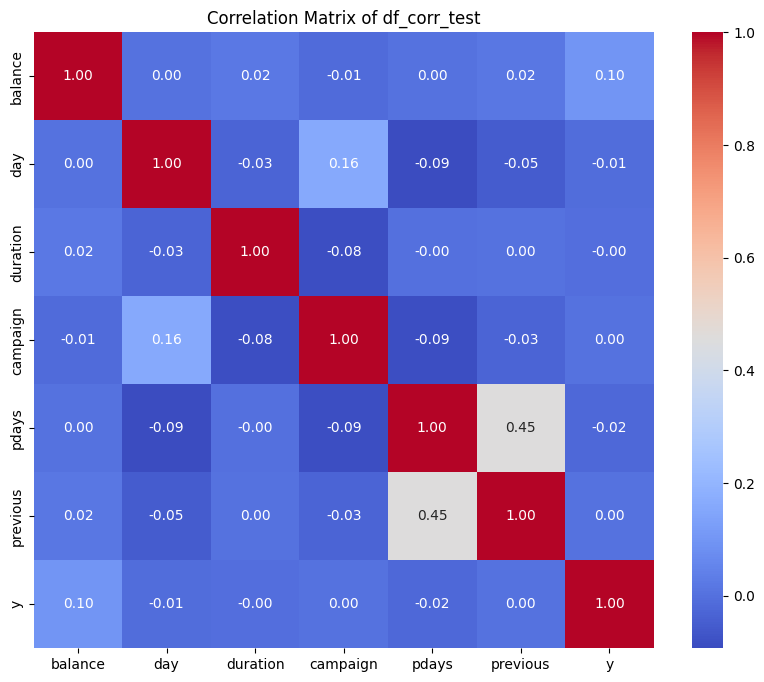

In [11]:
# Предположим, что у нас уже есть DataFrame под названием df_corr_test
# Выводим матрицу корреляции (только для числовых столбцов)
correlation_matrix = df_corr_test.select_dtypes(['int']).corr()

# Отображаем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of df_corr_test")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def resolve_regression(X, y, regularization=None):
    """
    Выполняет регрессию с учетом регуляризации.

    Parameters:
    - X: Входные данные (признаки).
    - y: Целевые значения.
    - regularization: Тип регуляризации ('l1', 'l2', None). Если None, используется обычная линейная регрессия.
    """
    # Разделение данных на обучающую и тестовую выборки (80% / 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Инициализация модели в зависимости от типа регуляризации
    if regularization == 'l1':
        model = Lasso() # L1-регуляризация (Lasso)
    elif regularization == 'l2':
        model = Ridge() # L2-регуляризация (Ridge)
    else:
        model = LinearRegression() # Линейная регрессия без регуляризации

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисление метрик качества
    mae = mean_absolute_error(y_test, y_pred) # Средняя абсолютная ошибка
    mse = mean_squared_error(y_test, y_pred)  # Средняя квадратичная ошибка
    r2 = r2_score(y_test, y_pred)             # Коэффициент детерминации (R^2)

    # Вывод результатов
    print(f"Regularization: {regularization}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    return model, X_train, X_test, y_train, y_test

In [13]:
resolve_regression(X, y)
None

Regularization: None
Mean Absolute Error (MAE): 6.55
Mean Squared Error (MSE): 65.23
R^2 Score: 0.42


Кратко - Тут всё плохо

In [15]:
resolve_regression(X[['balance']], y)
None

Regularization: None
Mean Absolute Error (MAE): 8.69
Mean Squared Error (MSE): 111.82
R^2 Score: 0.01


Пора датасет менять?

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   balance              45211 non-null  int64
 1   day                  45211 non-null  int64
 2   duration             45211 non-null  int64
 3   campaign             45211 non-null  int64
 4   pdays                45211 non-null  int64
 5   previous             45211 non-null  int64
 6   job_blue-collar      45211 non-null  bool 
 7   job_entrepreneur     45211 non-null  bool 
 8   job_housemaid        45211 non-null  bool 
 9   job_management       45211 non-null  bool 
 10  job_retired          45211 non-null  bool 
 11  job_self-employed    45211 non-null  bool 
 12  job_services         45211 non-null  bool 
 13  job_student          45211 non-null  bool 
 14  job_technician       45211 non-null  bool 
 15  job_unemployed       45211 non-null  bool 
 16  job_unknown          4